In [1]:
# %%
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb # This import should be inside a try-except block

# For model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report # Useful for a comprehensive report
)

# Set display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
# Cell 2: Load the Dataset
try:
    df = pd.read_csv('Titanic-Dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: CSV not found. Please make sure the file is in the correct directory.")

Dataset loaded successfully!


In [3]:
# Cell 3: Initial Data Inspection - Head and Info
print("--- First 5 rows of the dataset ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()

--- First 5 rows of the dataset ---
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S

--- Dataset Info ---
<class 'pandas.cor

In [4]:
# Cell 4: Basic Statistics - Describe
print("--- Descriptive Statistics ---")
print(df.describe())

--- Descriptive Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [5]:
# Cell 5: Check for Missing Values
print("--- Missing Values per Column ---")
print(df.isnull().sum())
print("\n--- Percentage of Missing Values ---")
print((df.isnull().sum() / len(df)) * 100)

--- Missing Values per Column ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Percentage of Missing Values ---
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [6]:
# Cell 6: Handle Missing Values - Age
print("--- Handling Missing 'Age' values ---")
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Missing 'Age' values imputed with median: {median_age}")
print(f"Missing 'Age' values after imputation: {df['Age'].isnull().sum()}")

--- Handling Missing 'Age' values ---
Missing 'Age' values imputed with median: 28.0
Missing 'Age' values after imputation: 0


/tmp/ipykernel_28664/3854964429.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [7]:
# Cell 7: Handle Missing Values - Embarked
if df['Embarked'].isnull().sum() > 0:
    print("\n--- Handling Missing 'Embarked' values ---")
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)
    print(f"Missing 'Embarked' values imputed with mode: {mode_embarked}")
    print(f"Missing 'Embarked' values after imputation: {df['Embarked'].isnull().sum()}")


--- Handling Missing 'Embarked' values ---
Missing 'Embarked' values imputed with mode: S
Missing 'Embarked' values after imputation: 0


/tmp/ipykernel_28664/1026554098.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


In [8]:
# Cell 8: Drop 'Cabin' Column
print("\n--- Dropping 'Cabin' column ---")
df.drop('Cabin', axis=1, inplace=True)
print("Cabin column dropped.")
print(f"Remaining columns: {df.columns.tolist()}")


--- Dropping 'Cabin' column ---
Cabin column dropped.
Remaining columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [9]:
# Cell 9: Verify Missing Values After Handling
print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())
print("\n--- Percentage of Missing Values After Handling ---")
print((df.isnull().sum() / len(df)) * 100)


--- Missing Values After Handling ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

--- Percentage of Missing Values After Handling ---
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [10]:
# Cell 10: Feature Engineering - Family Size
print("\n--- Creating 'FamilySize' feature ---")
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
print("New feature 'FamilySize' created.")
print(df[['SibSp', 'Parch', 'FamilySize']].head())


--- Creating 'FamilySize' feature ---
New feature 'FamilySize' created.
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [11]:
# Cell 11: Feature Engineering - IsAlone
print("\n--- Creating 'IsAlone' feature ---")
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print("New feature 'IsAlone' created.")
print(df[['FamilySize', 'IsAlone']].head())


--- Creating 'IsAlone' feature ---
New feature 'IsAlone' created.
   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


In [12]:
# Cell 12: Drop Redundant Features
print("\n--- Dropping redundant features: Name, SibSp, Parch, Ticket ---")
df.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
print("Redundant features dropped.")
print(f"Final columns after feature engineering: {df.columns.tolist()}")


--- Dropping redundant features: Name, SibSp, Parch, Ticket ---
Redundant features dropped.
Final columns after feature engineering: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']


In [13]:
# Cell 13: Convert Categorical to Numerical (One-Hot Encoding)
print("\n--- Converting 'Sex' and 'Embarked' to numerical using One-Hot Encoding ---")
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
# drop_first=True avoids multicollinearity by dropping the first category
print("Categorical features converted.")
print(df.head())
print(df.info())


--- Converting 'Sex' and 'Embarked' to numerical using One-Hot Encoding ---
Categorical features converted.
   PassengerId  Survived  Pclass   Age     Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  Embarked_S
0            1         0       3  22.0   7.2500           2        0         1           0           1
1            2         1       1  38.0  71.2833           2        0         0           0           0
2            3         1       3  26.0   7.9250           1        1         0           0           1
3            4         1       1  35.0  53.1000           2        0         0           0           1
4            5         0       3  35.0   8.0500           1        1         1           0           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  



--- Correlation Matrix ---


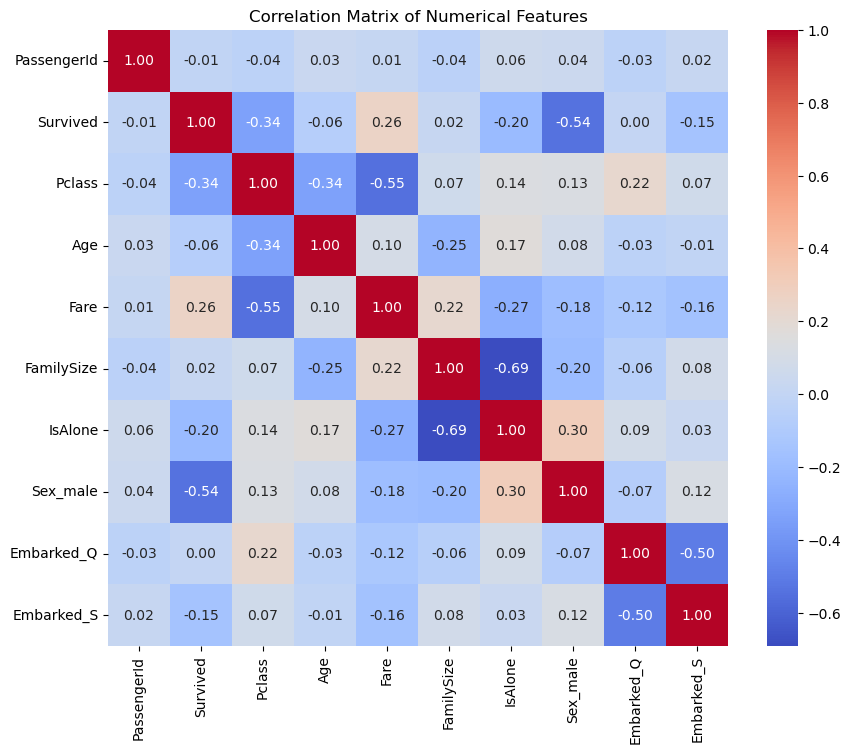

In [14]:
# Cell 14: Correlation Matrix (Numerical Features)
print("\n--- Correlation Matrix ---")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


--- Survival Rate by Passenger Class ---
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


/tmp/ipykernel_28664/3507733506.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=pclass_survival, palette='viridis')


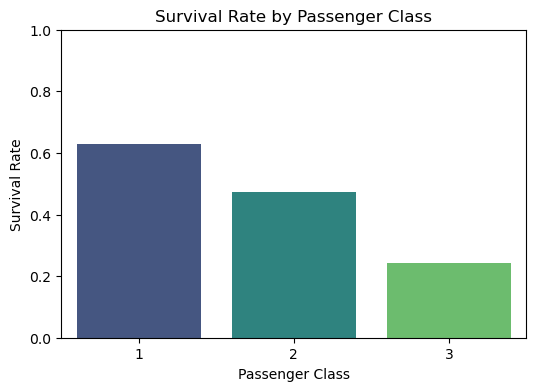

In [15]:
# Cell 15: Survival Rate by Passenger Class (Pclass)
print("\n--- Survival Rate by Passenger Class ---")
pclass_survival = df.groupby('Pclass')['Survived'].mean().reset_index()
print(pclass_survival)

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=pclass_survival, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


--- Survival Rate by Sex ---
      Sex  Survived
0  Female  0.742038
1    Male  0.188908


/tmp/ipykernel_28664/1533712409.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=sex_survival, palette='magma')


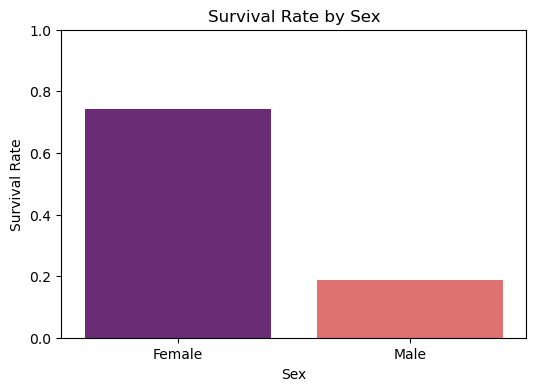

In [16]:
# Cell 16: Survival Rate by Sex
print("\n--- Survival Rate by Sex ---")
sex_survival = df.groupby('Sex_male')['Survived'].mean().reset_index()
sex_survival['Sex'] = sex_survival['Sex_male'].map({0: 'Female', 1: 'Male'})
print(sex_survival[['Sex', 'Survived']])

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=sex_survival, palette='magma')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


--- Age Distribution and Survival ---


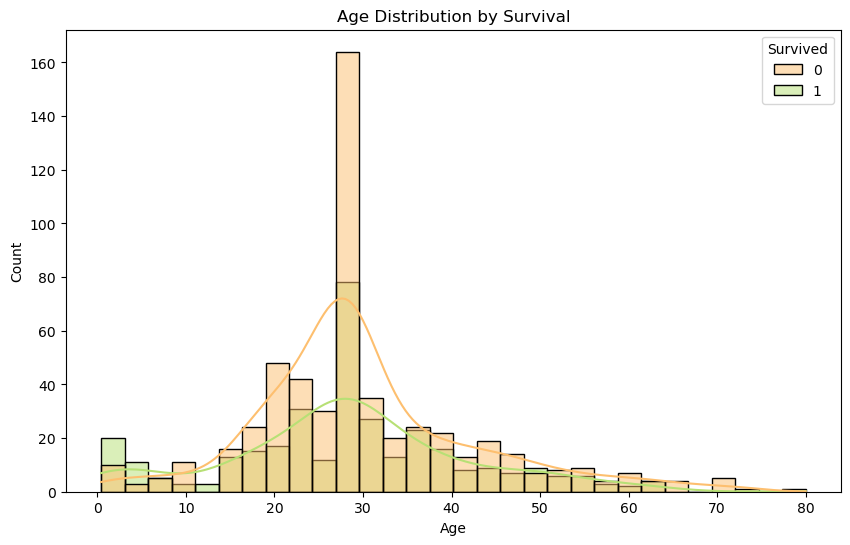


Average Age of Survivors vs. Non-Survivors:
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


In [17]:
# Cell 17: Age Distribution and Survival
print("\n--- Age Distribution and Survival ---")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, palette='RdYlGn')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Further insight: Average age of survivors vs non-survivors
print("\nAverage Age of Survivors vs. Non-Survivors:")
print(df.groupby('Survived')['Age'].mean())


--- Fare Distribution and Survival ---


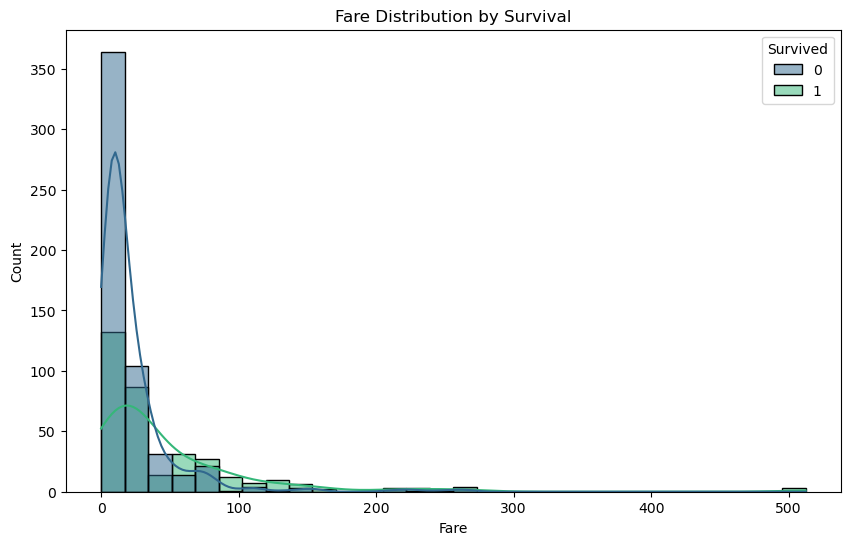


Average Fare of Survivors vs. Non-Survivors:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [18]:
# Cell 18: Fare Distribution and Survival
print("\n--- Fare Distribution and Survival ---")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Further insight: Average fare of survivors vs non-survivors
print("\nAverage Fare of Survivors vs. Non-Survivors:")
print(df.groupby('Survived')['Fare'].mean())


--- Survival Rate by Family Size ---
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


/tmp/ipykernel_28664/2660006791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=familysize_survival, palette='cubehelix')


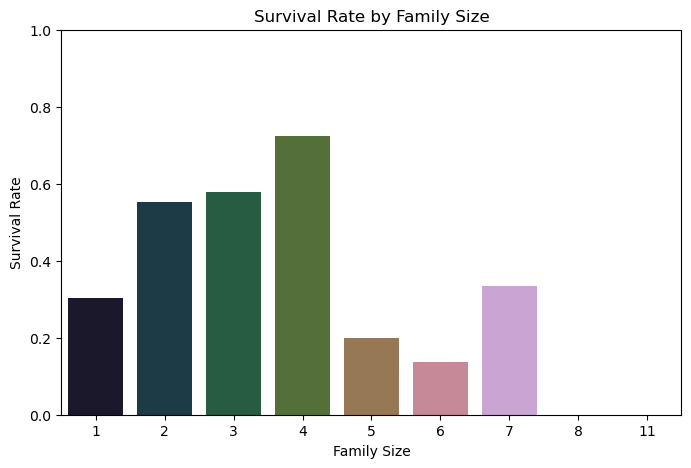

In [19]:
# Cell 19: Survival Rate by Family Size
print("\n--- Survival Rate by Family Size ---")
familysize_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()
print(familysize_survival)

plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=familysize_survival, palette='cubehelix')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

In [20]:
# Cell 20: Final Preprocessed Data Head
print("\n--- Final Preprocessed Data ---")
print(df.head())
print("\n--- Final Data Info ---")
df.info()


--- Final Preprocessed Data ---
   PassengerId  Survived  Pclass   Age     Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  Embarked_S
0            1         0       3  22.0   7.2500           2        0         1           0           1
1            2         1       1  38.0  71.2833           2        0         0           0           0
2            3         1       3  26.0   7.9250           1        1         0           0           1
3            4         1       1  35.0  53.1000           2        0         0           0           1
4            5         0       3  35.0   8.0500           1        1         1           0           1

--- Final Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age 

In [21]:
# Cell 21: Split Data into Features (X) and Target (y)
print("--- Splitting Data into X (Features) and y (Target) ---")
X = df.drop('Survived', axis=1)
y = df['Survived']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

--- Splitting Data into X (Features) and y (Target) ---
Shape of X: (891, 9)
Shape of y: (891,)

First 5 rows of X:
   PassengerId  Pclass   Age     Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  Embarked_S
0            1       3  22.0   7.2500           2        0         1           0           1
1            2       1  38.0  71.2833           2        0         0           0           0
2            3       3  26.0   7.9250           1        1         0           0           1
3            4       1  35.0  53.1000           2        0         0           0           1
4            5       3  35.0   8.0500           1        1         1           0           1

First 5 values of y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [22]:
# Cell 22: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

print("\n--- Splitting Data into Training and Testing Sets ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of target variable (Survived) is the same in both train and test sets

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- Splitting Data into Training and Testing Sets ---
X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)


In [23]:
print("\n--- Standardizing Numerical Features ---")
if 'X_train' in locals():
    scaler = StandardScaler()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    if numerical_cols:
        X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
        print("Numerical features scaled successfully.")
    else:
        print("No numerical columns found for scaling.")
    print("\nFirst 5 rows of scaled X_train:")
    print(X_train.head())
else:
    print("X_train not defined. Cannot perform numerical feature standardization.")



--- Standardizing Numerical Features ---
Numerical features scaled successfully.

First 5 rows of scaled X_train:
     PassengerId    Pclass       Age      Fare  FamilySize   IsAlone  Sex_male  Embarked_Q  Embarked_S
692     0.966222  0.829568 -0.112078  0.513812   -0.556339  0.800346  0.742427   -0.289333    0.611978
481     0.146119 -0.370945 -0.112078 -0.662563   -0.556339  0.800346  0.742427   -0.289333    0.611978
527     0.324909 -1.571457 -0.112078  3.955399   -0.556339  0.800346  0.742427   -0.289333    0.611978
855     1.599762  0.829568 -0.879807 -0.467874    0.073412 -1.249460 -1.346933   -0.289333    0.611978
801     1.389877 -0.370945  0.118241 -0.115977    0.703162 -1.249460 -1.346933   -0.289333    0.611978


In [24]:
def evaluate_model(model_name, y_test, y_pred, y_prob=None, cm_cmap='Blues'):
    """
    Evaluates a classification model and displays key metrics and visualizations.

    Args:
        model_name (str): The name of the model (e.g., 'Logistic Regression').
        y_test (pd.Series or np.array): True labels.
        y_pred (np.array): Predicted labels.
        y_prob (np.array, optional): Predicted probabilities for the positive class.
                                     Required for ROC AUC. Defaults to None.
        cm_cmap (str, optional): Colormap for the confusion matrix. Defaults to 'Blues'.
    """
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc:.4f}")

    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 6)) # Consistent CM size
    sns.heatmap(cm, annot=True, fmt='d', cmap=cm_cmap, cbar=False,
                xticklabels=['Predicted 0 (No)', 'Predicted 1 (Yes)'],
                yticklabels=['Actual 0 (No)', 'Actual 1 (Yes)'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout() # Ensures everything fits
    plt.show()

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(7, 6)) # Consistent ROC size
        # Use first letter of cmap for color if possible, or a default
        plot_color = cm_cmap.lower().split('s')[0] if cm_cmap.lower().endswith('s') else 'darkorange'
        plt.plot(fpr, tpr, color=plot_color, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True) # Add grid for clarity
        plt.tight_layout()
        plt.show()


--- Training Logistic Regression Model ---

--- Logistic Regression Evaluation ---
Accuracy: 0.7989
Precision: 0.7619
Recall: 0.6957
F1-Score: 0.7273


ROC AUC Score: 0.8422

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



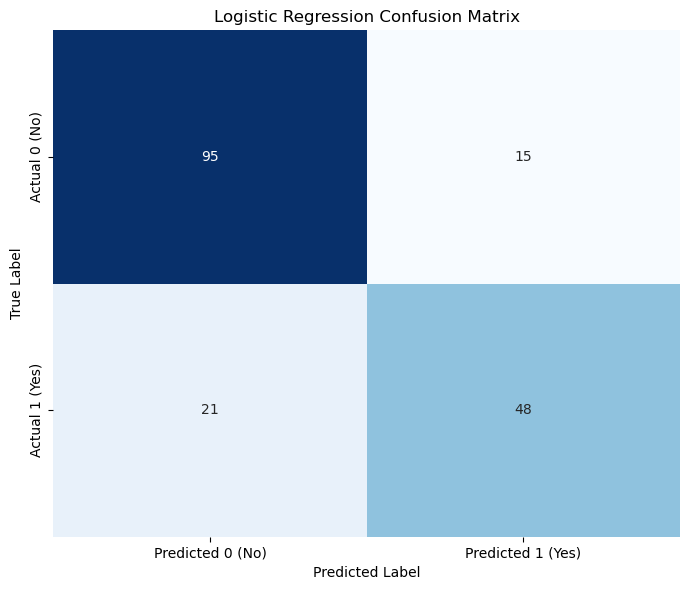

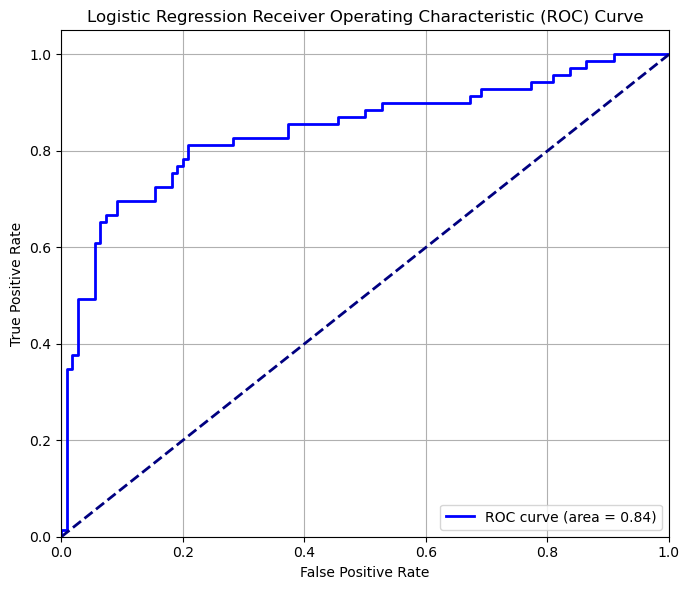

In [25]:
# %%
# Cell 24: Model 1: Logistic Regression
print("\n--- Training Logistic Regression Model ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg_model.predict(X_test)
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1] # Probabilities for ROC curve

# Evaluate using helper function
evaluate_model('Logistic Regression', y_test, y_pred_lr, y_prob_lr, cm_cmap='Blues')


--- Training K-Nearest Neighbors (KNN) Model ---

--- KNN Evaluation ---
Accuracy: 0.7654
Precision: 0.7143
Recall: 0.6522
F1-Score: 0.6818
ROC AUC Score: 0.8132

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.65      0.68        69

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



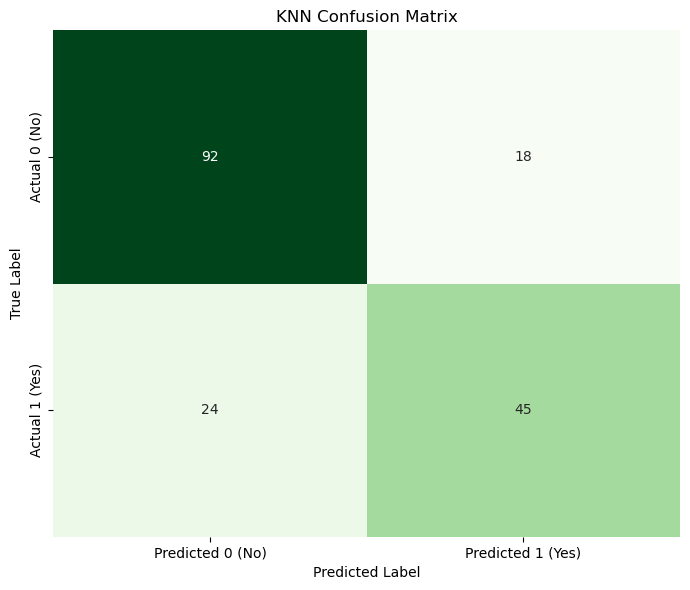

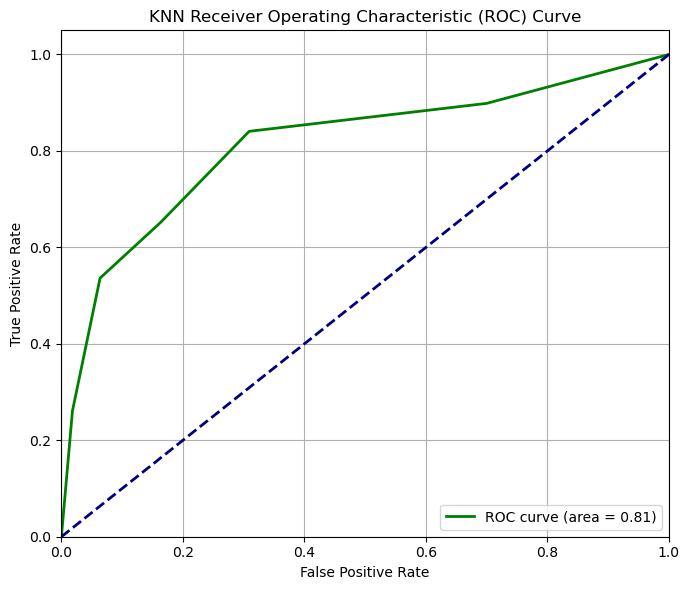

In [26]:
# %%
# Cell 25: Model 2: K-Nearest Neighbors (KNN)
print("\n--- Training K-Nearest Neighbors (KNN) Model ---")
knn_model = KNeighborsClassifier(n_neighbors=5) # Common starting point for n_neighbors
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate using helper function
evaluate_model('KNN', y_test, y_pred_knn, y_prob_knn, cm_cmap='Greens')


--- Training Linear Support Vector Machine (SVM) Model ---

--- Linear SVM Evaluation ---
Accuracy: 0.8156
Precision: 0.8000
Recall: 0.6957
F1-Score: 0.7442

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



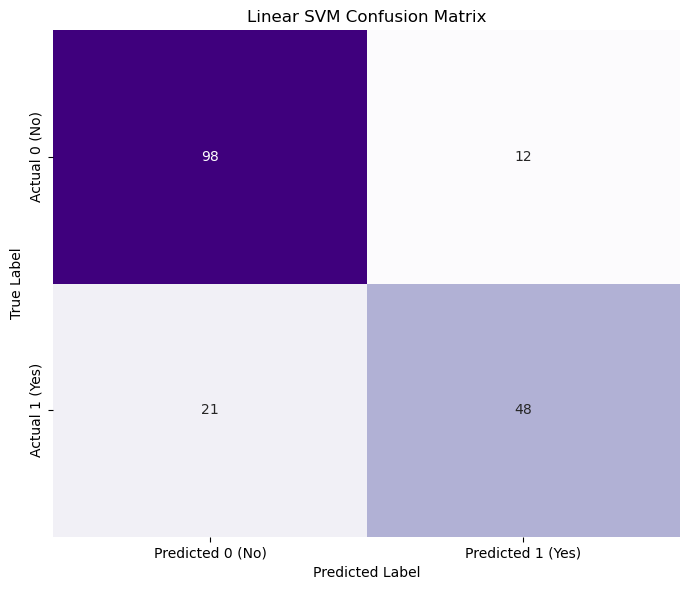


Note: LinearSVC does not directly provide predict_proba for ROC AUC calculation.


In [27]:
# %%
# Cell 26: Model 3: Support Vector Machine (SVM) - Linear SVC
print("\n--- Training Linear Support Vector Machine (SVM) Model ---")
svm_model = LinearSVC(random_state=42, dual=False) # dual=False recommended for n_samples > n_features
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate using helper function. Note: LinearSVC does not provide predict_proba directly.
# If ROC AUC is desired for SVM, consider using SVC(probability=True) instead (but it's slower).
evaluate_model('Linear SVM', y_test, y_pred_svm, cm_cmap='Purples')
print("\nNote: LinearSVC does not directly provide predict_proba for ROC AUC calculation.")
# If you used SVC(probability=True), you'd also need y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
# and pass it to evaluate_model.


--- Training Decision Tree Classifier Model ---

--- Decision Tree Evaluation ---
Accuracy: 0.7318
Precision: 0.6479
Recall: 0.6667
F1-Score: 0.6571
ROC AUC Score: 0.7717

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       110
           1       0.65      0.67      0.66        69

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



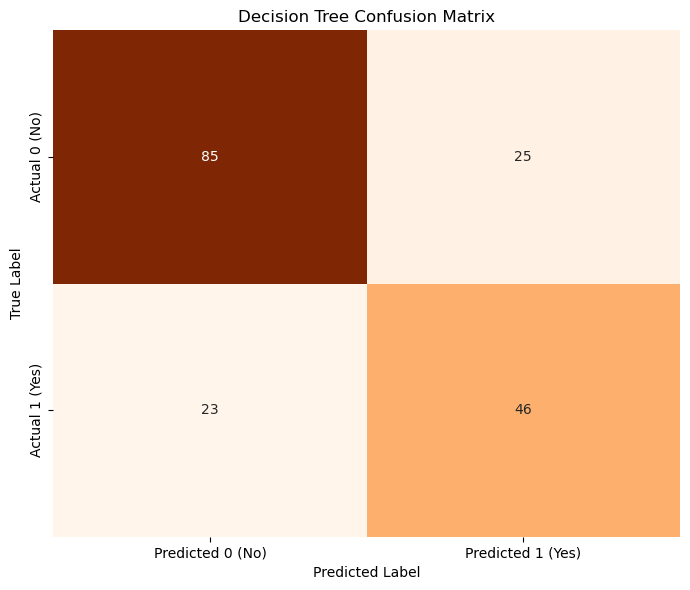

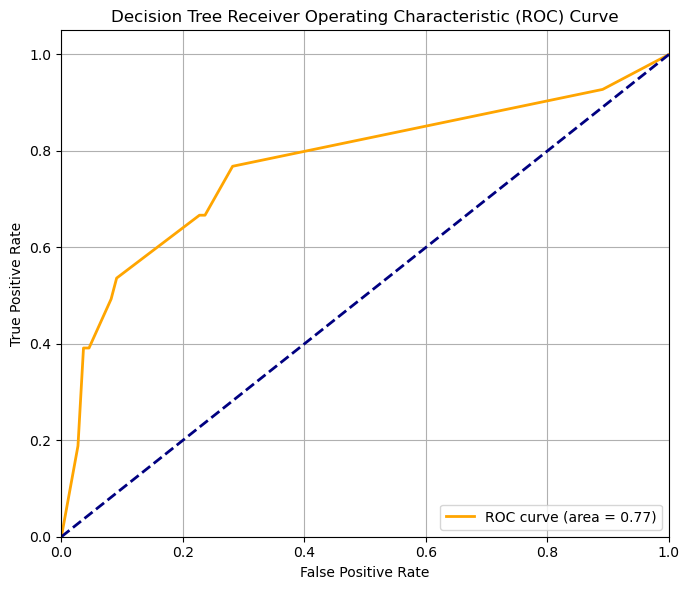


--- Decision Tree Feature Importance ---
Sex_male       0.521289
Pclass         0.177220
Age            0.122929
Fare           0.069702
FamilySize     0.048835
PassengerId    0.042857
Embarked_S     0.017168
IsAlone        0.000000
Embarked_Q     0.000000
dtype: float64


/tmp/ipykernel_28664/636758972.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_dt.values, y=feature_importances_dt.index, palette='rocket')


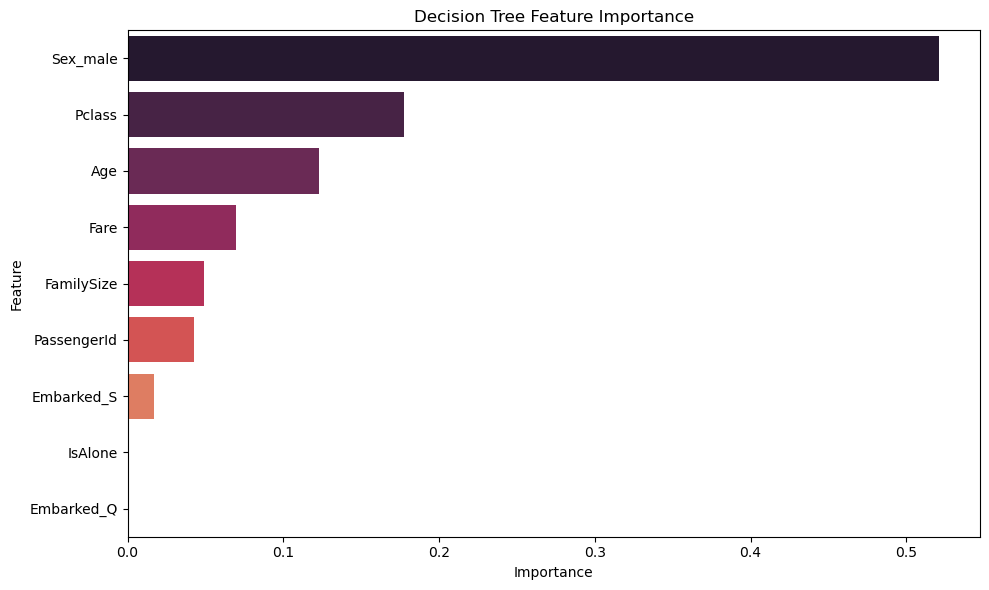

NameError: name 'plot_tree' is not defined

<Figure size 2000x1500 with 0 Axes>

In [28]:
# %%
# Cell 27: Model 4: Decision Tree Classifier
print("\n--- Training Decision Tree Classifier Model ---")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5) # max_depth to prevent overfitting
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate using helper function
evaluate_model('Decision Tree', y_test, y_pred_dt, y_prob_dt, cm_cmap='Oranges')

# Feature Importance
print("\n--- Decision Tree Feature Importance ---")
feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances_dt)

plt.figure(figsize=(10, 6)) # Specific size for feature importance plot
sns.barplot(x=feature_importances_dt.values, y=feature_importances_dt.index, palette='rocket')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize the Decision Tree (optional, but very insightful for small trees)
plt.figure(figsize=(20, 15)) # Increased size for better visibility of the tree
plot_tree(dt_model, filled=True, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (Max Depth 5)')
plt.tight_layout()
plt.show()


--- Training Random Forest Classifier Model ---

--- Random Forest Evaluation ---
Accuracy: 0.8156
Precision: 0.8103
Recall: 0.6812
F1-Score: 0.7402
ROC AUC Score: 0.8440

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



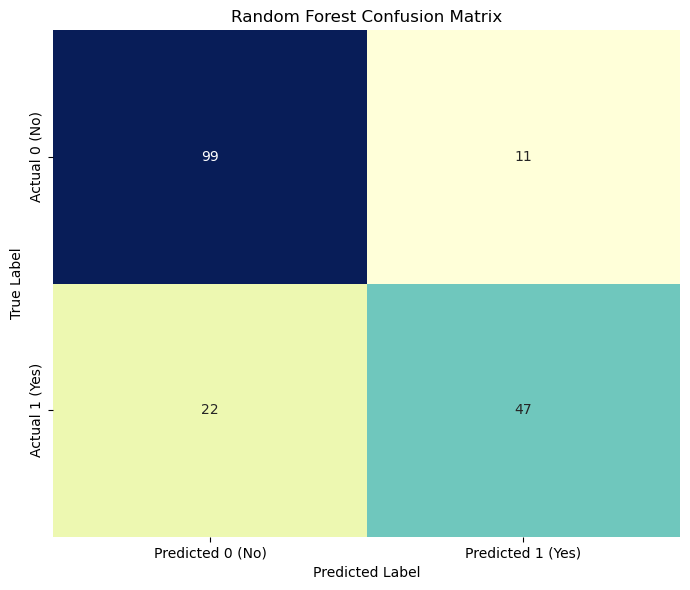

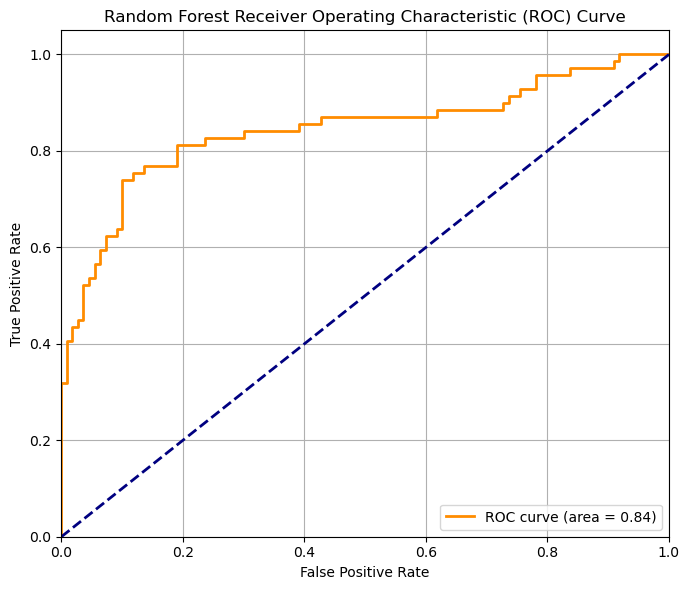


--- Random Forest Feature Importance ---
Sex_male       0.345357
Fare           0.187897
Age            0.130329
PassengerId    0.115367
Pclass         0.110106
FamilySize     0.065286
Embarked_S     0.021340
IsAlone        0.015953
Embarked_Q     0.008364
dtype: float64


/tmp/ipykernel_7638/2896570092.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rf.values, y=feature_importances_rf.index, palette='mako')


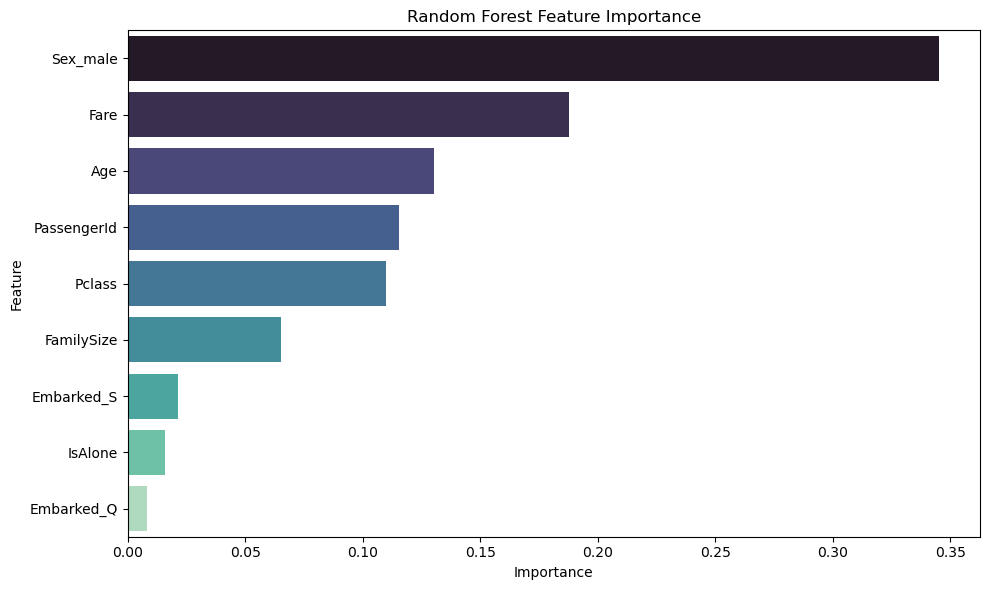

In [ ]:
# %%
# Cell 28: Model 5: Random Forest Classifier
print("\n--- Training Random Forest Classifier Model ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7) # n_estimators: number of trees
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate using helper function
evaluate_model('Random Forest', y_test, y_pred_rf, y_prob_rf, cm_cmap='YlGnBu')

# Feature Importance
print("\n--- Random Forest Feature Importance ---")
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances_rf)

plt.figure(figsize=(10, 6)) # Specific size for feature importance plot
sns.barplot(x=feature_importances_rf.values, y=feature_importances_rf.index, palette='mako')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


--- Training LightGBM Classifier Model ---
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

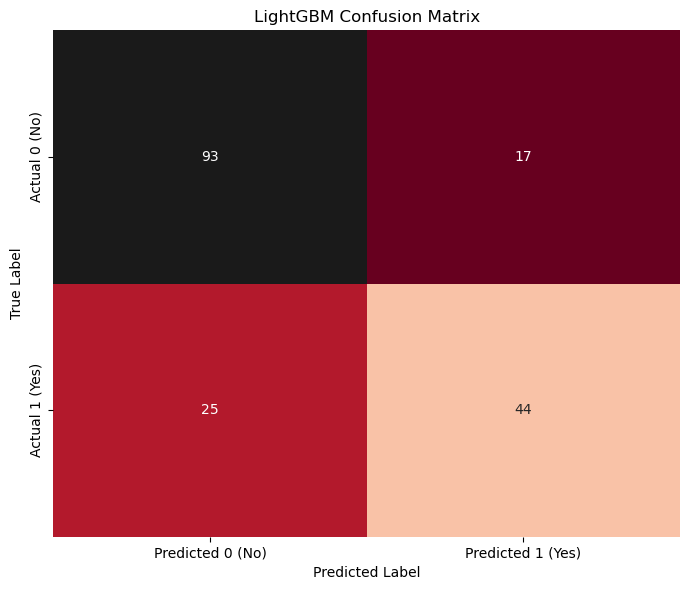

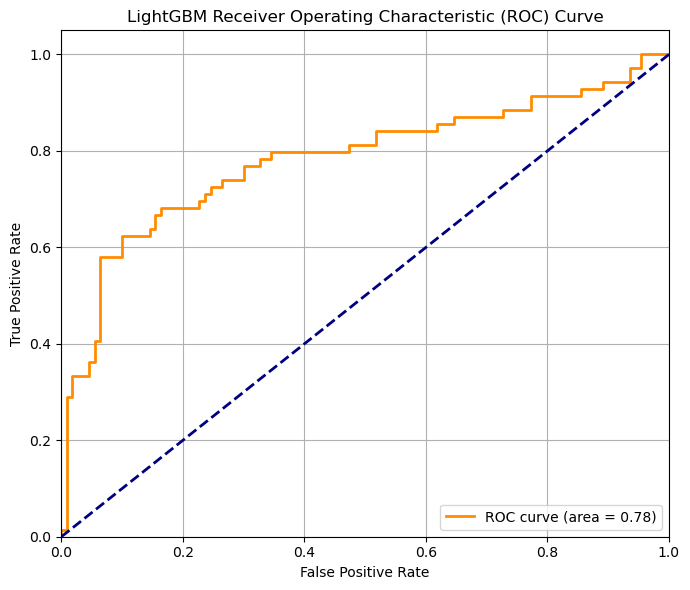


--- LightGBM Feature Importance ---
PassengerId    1979
Fare           1492
Age            1252
FamilySize      250
Pclass          199
Sex_male        185
Embarked_S      168
IsAlone          29
Embarked_Q        0
dtype: int32


/tmp/ipykernel_7638/3965009403.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_lgbm.values, y=feature_importances_lgbm.index, palette='flare')


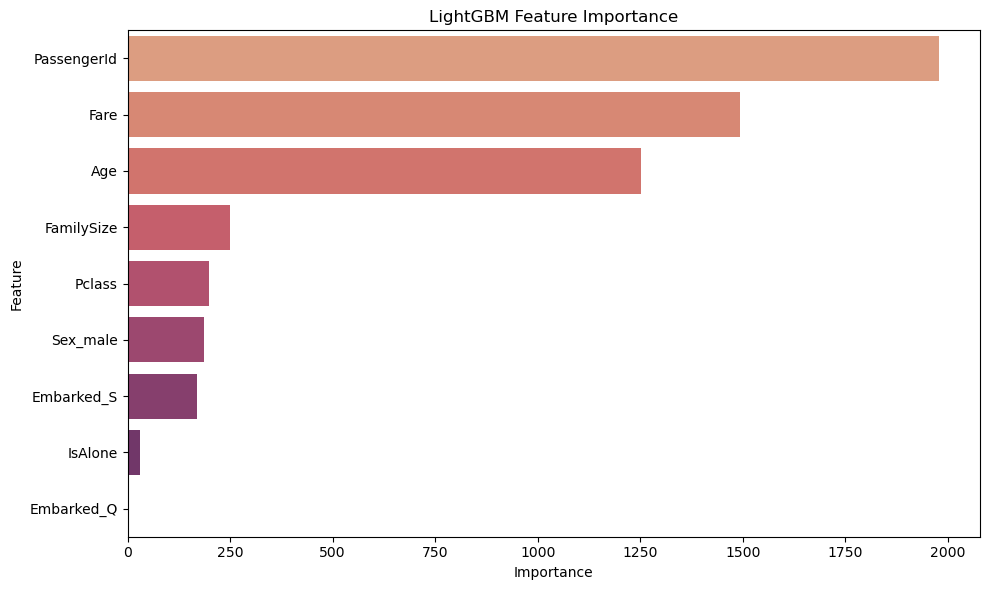

In [ ]:
if lgb is not None:
    print("\n--- Training LightGBM Classifier Model ---")
    lgbm_model = lgb.LGBMClassifier(random_state=42, n_estimators=200, learning_rate=0.05, num_leaves=31)
    lgbm_model.fit(X_train, y_train)

    # Predictions
    y_pred_lgbm = lgbm_model.predict(X_test)
    y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

    # Evaluate using helper function
    evaluate_model('LightGBM', y_test, y_pred_lgbm, y_prob_lgbm, cm_cmap='RdGy')

    # Feature Importance
    print("\n--- LightGBM Feature Importance ---")
    feature_importances_lgbm = pd.Series(lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(feature_importances_lgbm)

    plt.figure(figsize=(10, 6)) # Specific size for feature importance plot
    sns.barplot(x=feature_importances_lgbm.values, y=feature_importances_lgbm.index, palette='flare')
    plt.title('LightGBM Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("\n--- Skipping LightGBM: LightGBM library not found. Please install it with 'pip install lightgbm'. ---")